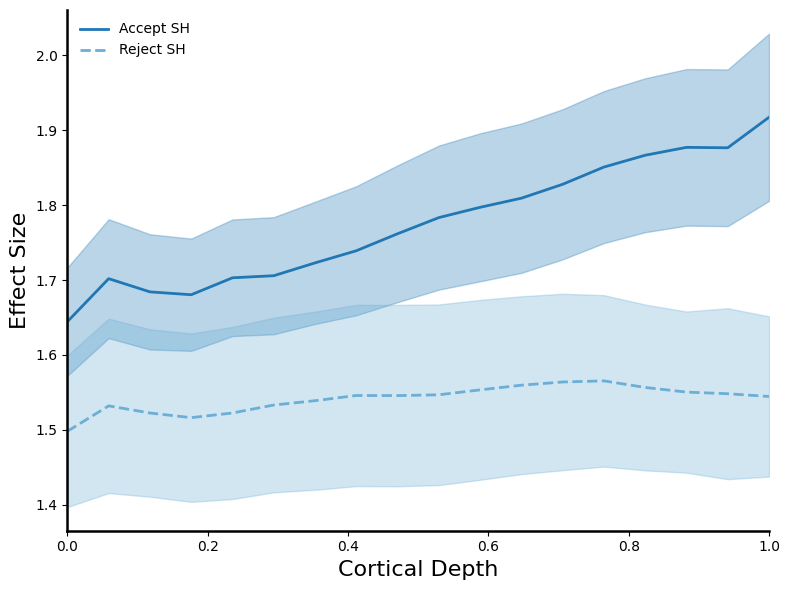

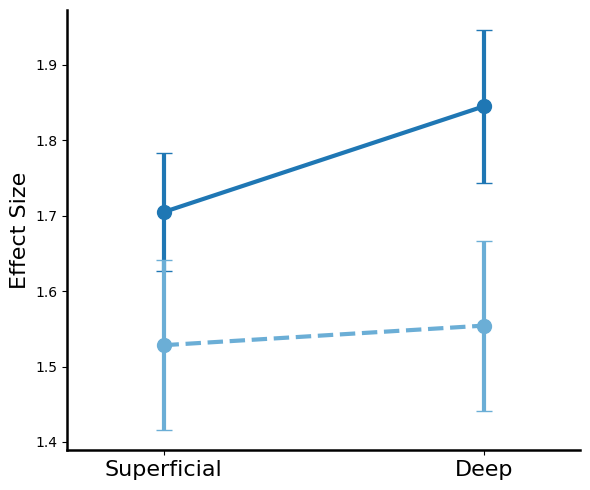


RM-ANOVA (Decision × Depth) from source file:
           Effect   F Value  Num DF  Den DF    Pr > F
0        Decision  3.500854       1      19  0.076819
1           Depth  4.484605       1      19  0.047614
2  Decision:Depth  3.329103       1      19  0.083830


In [106]:
# %% Load source data (Fig 7 Accept vs Reject) and reproduce laminar profile + superficial/deep plot
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

roi_tag = "dlPFC"   # must match what you saved
in_xlsx = os.path.join(data_dir, "output", f"SourceData_Fig7_{roi_tag}_AR_laminar.xlsx")

df_acc = pd.read_excel(in_xlsx, sheet_name="Accept_Layers")
df_rej = pd.read_excel(in_xlsx, sheet_name="Reject_Layers")
df_dep = pd.read_excel(in_xlsx, sheet_name="Depth")
df_sd  = pd.read_excel(in_xlsx, sheet_name="SupDeep_Subject")
df_anv = pd.read_excel(in_xlsx, sheet_name="ANOVA_RM")

layer_cols = [c for c in df_acc.columns if c.startswith("L")]
depth = df_dep["CorticalDepth"].to_numpy(dtype=float)

acc_all = df_acc[layer_cols].to_numpy(dtype=float)
rej_all = df_rej[layer_cols].to_numpy(dtype=float)

def mean_sem(mat):
    m = np.nanmean(mat, axis=0)
    n = np.sum(np.isfinite(mat), axis=0)
    se = np.nanstd(mat, axis=0, ddof=1) / np.sqrt(np.maximum(n, 1))
    se[n < 2] = np.nan
    return m, se

acc_mean, acc_sem = mean_sem(acc_all)
rej_mean, rej_sem = mean_sem(rej_all)

# Blue palette (e.g., Outcome Gain vs Loss)
BLUE_DARK  = "#1f77b4"   # deep blue
BLUE_LIGHT = "#6baed6"   # light blue

# Red palette (e.g., Outcome Gain vs Loss)
RED_DARK  = "#a50f15"   # deep burgundy
RED_LIGHT = "#fb6a4a"   # light red-orange (still reads as red)

color1 = BLUE_DARK
color2 = BLUE_LIGHT

# ---------------------------
# Plot 1: Laminar profile
# ---------------------------
fig, ax = plt.subplots(figsize=(8, 6))

ax.fill_between(depth, acc_mean - acc_sem, acc_mean + acc_sem, color=color1, alpha=0.3)
ax.plot(depth, acc_mean, linewidth=2, color=color1, label="Accept SH")

ax.fill_between(depth, rej_mean - rej_sem, rej_mean + rej_sem, color=color2, alpha=0.3)
ax.plot(depth, rej_mean, linewidth=2, linestyle="--", color=color2, label="Reject SH")

ax.set_xlabel("Cortical Depth", fontsize=16)
ax.set_ylabel("Effect Size", fontsize=16)
ax.set_xlim([0, 1])
ax.legend(frameon=False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(1.8)
ax.spines["bottom"].set_linewidth(1.8)

plt.tight_layout()
out1 = os.path.join(data_dir, "output", f"Fig7_{roi_tag}_AR_layerprofile_from_source.png")
plt.savefig(out1, dpi=300, bbox_inches="tight")
plt.show()

# ---------------------------
# Plot 2: Superficial vs Deep
# ---------------------------
acc_sup  = df_sd["Accept_SH_Superficial"].to_numpy(dtype=float)
acc_deep = df_sd["Accept_SH_Deep"].to_numpy(dtype=float)
rej_sup  = df_sd["Reject_SH_Superficial"].to_numpy(dtype=float)
rej_deep = df_sd["Reject_SH_Deep"].to_numpy(dtype=float)

means = [
    [np.nanmean(acc_sup), np.nanmean(acc_deep)],
    [np.nanmean(rej_sup), np.nanmean(rej_deep)],
]
sems = [
    [np.nanstd(acc_sup, ddof=1)/np.sqrt(np.isfinite(acc_sup).sum()),
     np.nanstd(acc_deep, ddof=1)/np.sqrt(np.isfinite(acc_deep).sum())],
    [np.nanstd(rej_sup, ddof=1)/np.sqrt(np.isfinite(rej_sup).sum()),
     np.nanstd(rej_deep, ddof=1)/np.sqrt(np.isfinite(rej_deep).sum())],
]

x = np.arange(2)
x_labels = ["Superficial", "Deep"]

fig, ax = plt.subplots(figsize=(6, 5))
ax.errorbar(x, means[0], yerr=sems[0], marker="o", linewidth=3, markersize=10, capsize=6, color=color1, label="Accept SH")
ax.errorbar(x, means[1], yerr=sems[1], marker="o", linewidth=3, markersize=10, capsize=6, linestyle="--", color=color2, label="Reject SH")

ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=16)
ax.set_ylabel("Effect Size", fontsize=16)
ax.set_xlim(-0.3, 1.3)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(1.8)
ax.spines["bottom"].set_linewidth(1.8)

plt.tight_layout()
out2 = os.path.join(data_dir, "output", f"Fig7_{roi_tag}_AR_supdeep_from_source.png")
plt.savefig(out2, dpi=300, bbox_inches="tight")
plt.show()

print("\nRM-ANOVA (Decision × Depth) from source file:")
print(df_anv)
